# Telco Customer Churn Prediction

**Business Context:**  
Churn is a critical issue for telecom companies. Acquiring a new customer can cost up to 5–25 times more than retaining an existing one. By predicting which customers are likely to leave, Telco can proactively improve retention through targeted offers and customer service improvements.

**Objective:**  
Build a machine learning model to predict customer churn based on demographics, account details, and service usage. The goal is to identify patterns in churn behavior and create a reliable prediction model that can be used to reduce customer loss.

**Dataset Source:**  
[Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


In [68]:
"""
Notebook: 01_eda_and_cleaning.ipynb
Purpose: Perform initial exploration and cleaning of the Telco Customer Churn dataset.

Steps:
- Load and inspect data
- Explore missing values and distributions
- Clean and preprocess data for modeling
"""

# Core Libraries
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

# Data Exploration

In [72]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [73]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [74]:
# change total charges into numeric column (was object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [75]:
# checking for missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [76]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [77]:
# delete 11 rows where TotalCharges = NaN and tenure = 0

df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [78]:
# imbalanced classification problem
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [79]:
churn_counts

No     5163
Yes    1869
Name: Churn, dtype: int64

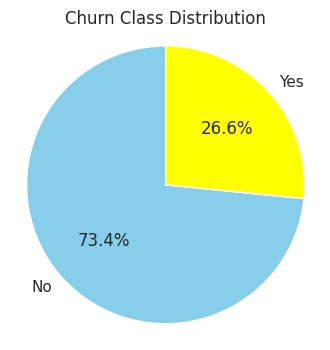

In [80]:
# Churn distribution - notice imbalanced data set
churn_counts = df['Churn'].replace({1: 'Yes', 0: 'No'}).value_counts()

# Plot
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'yellow'])
plt.title('Churn Class Distribution')
plt.axis('equal') 

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "churn_distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

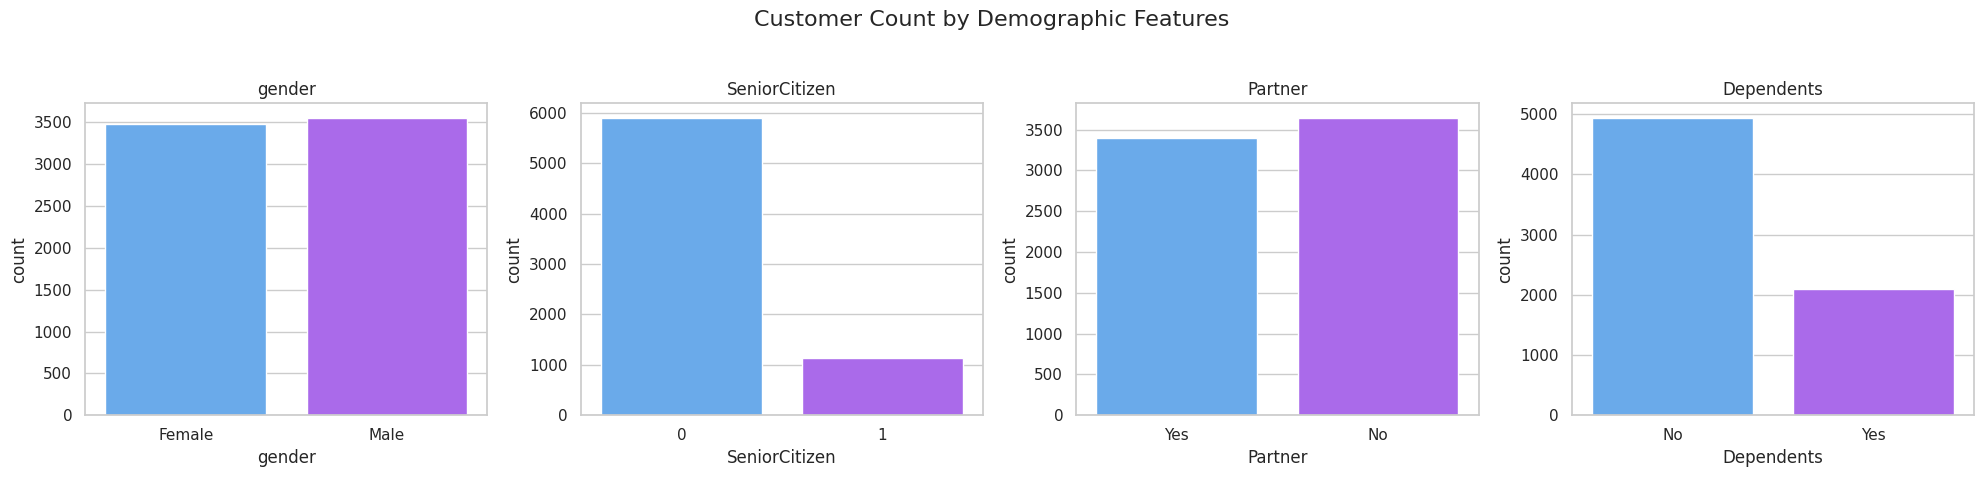

In [81]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,5))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df, palette="cool")
    ax.set_title(f"{col}")
    
# Set a title for the entire figure
plt.suptitle('Customer Count by Demographic Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "customer_count_demographics.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

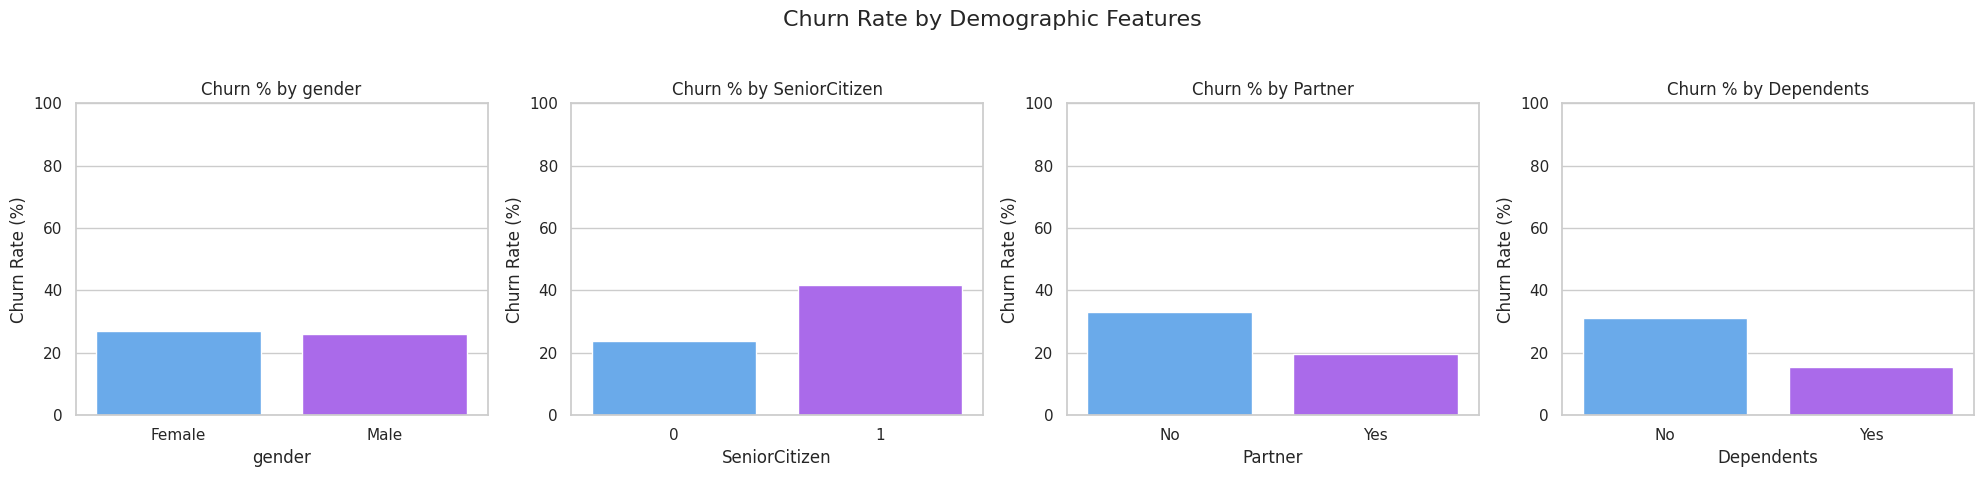

In [82]:
# Ensure Churn is numeric
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(float)

# Demographic features
demographic_cols = ['gender','SeniorCitizen','Partner','Dependents']

plt.figure(figsize=(20,5))

for i, col in enumerate(demographic_cols):
    ax = plt.subplot(1, len(demographic_cols), i+1)
    
    # Group and calculate churn rate
    churn_rate = df.groupby(col)['Churn'].mean() * 100
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="cool", ax=ax)
    
    
    
    ax.set_title(f"Churn % by {col}")
    ax.set_ylabel("Churn Rate (%)")
    ax.set_xlabel(col)
    ax.set_ylim(0, 100)

plt.suptitle('Churn Rate by Demographic Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "churn_rate_demographics.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

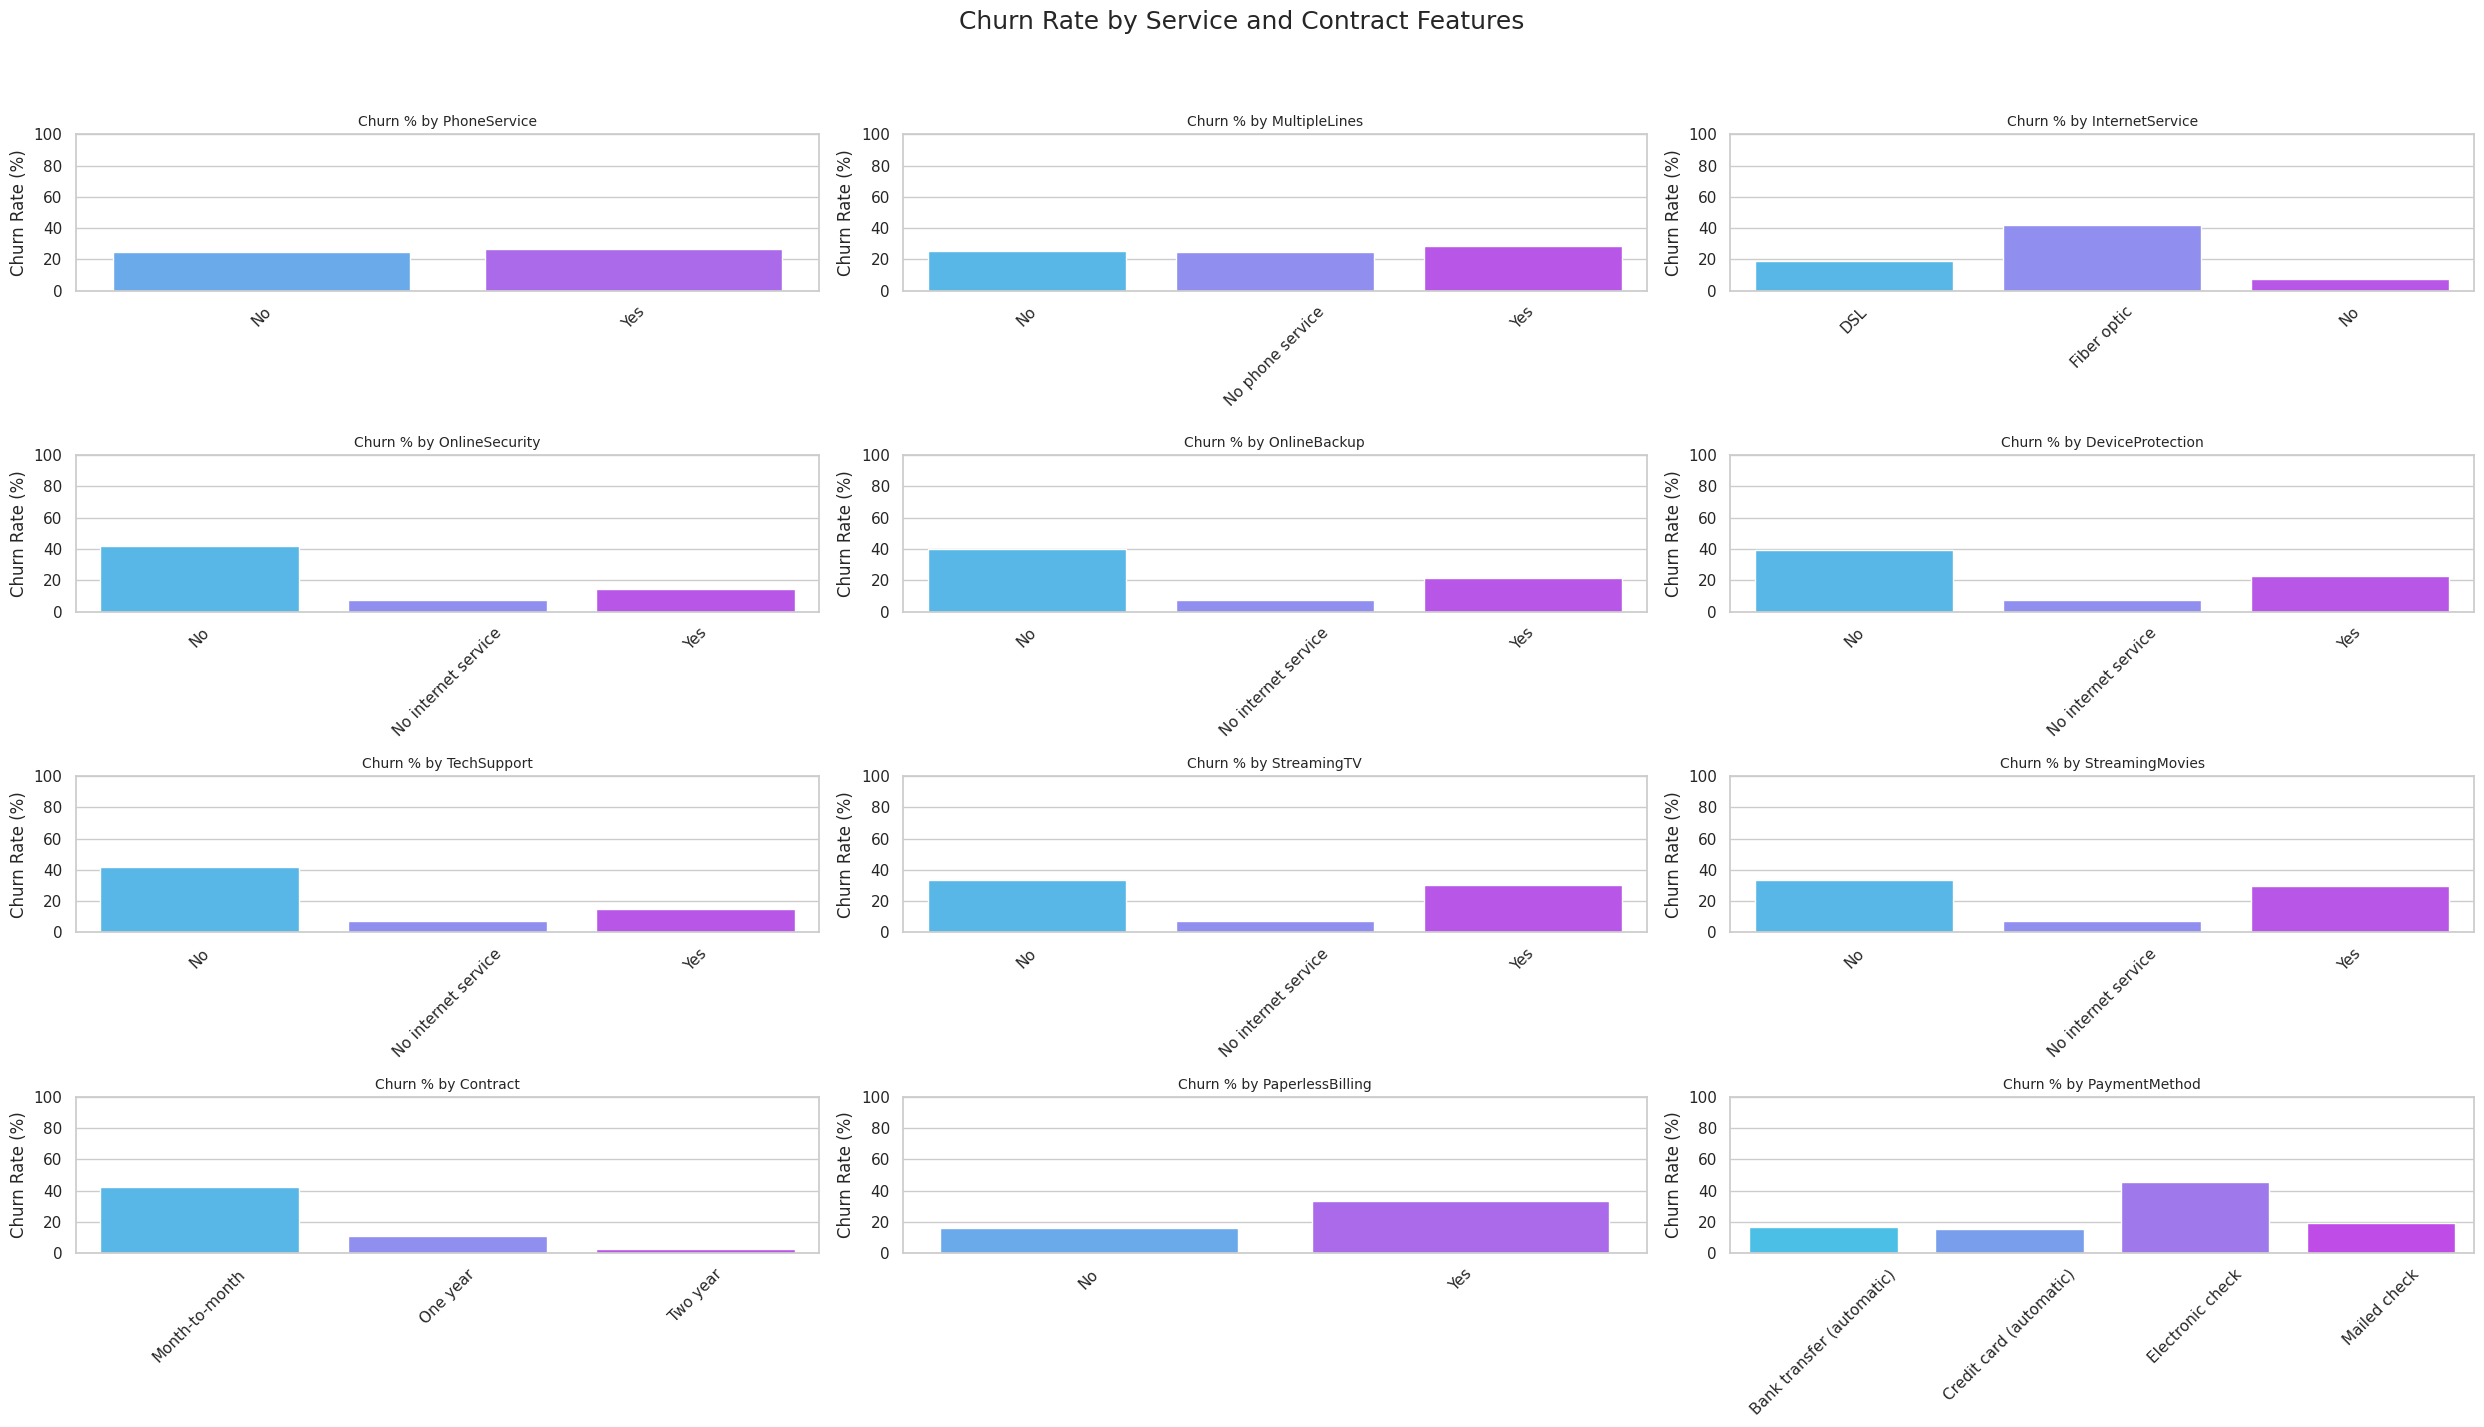

In [83]:
# Non-demographic categorical columns
non_demo_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(25, 15))

for i, col in enumerate(non_demo_cols):
    ax = plt.subplot(4, 3, i+1)
    
    churn_rate = df.groupby(col)['Churn'].mean() * 100
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="cool", ax=ax)
    
    ax.set_title(f"Churn % by {col}", fontsize=10)
    ax.set_ylabel("Churn Rate (%)")
    ax.set_xlabel("")
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Churn Rate by Service and Contract Features', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "churn_rate_service_contract.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

Key Observations – Demographic Features
* **Gender**: Churn rates between male and female customers are nearly identical, and customer counts are also balanced, suggesting gender is not a significant predictor of churn.

* **Senior Citizens**: Customers who are senior citizens exhibit a much higher churn rate compared to non seniors (c.40% vs 23%). However, the senior segment represents a smaller portion of the customer base, indicating limited impact on overall churn.

* **Partnership Status**: Customers without a partner show a higher churn rate than those with partners. This may point to lower loyalty or stickiness in single households.

* **Dependents**: Customers without dependents are more likely to churn, and they also represent a larger portion of the customer base. This group could be a valuable target for retention initiatives.

Key Observations – Service & Contract Features
* **Internet Service Type**: Customers using Fiber Optic internet churn at roughly twice the rate of DSL users. This may indicate dissatisfaction with fiber services or pricing and could justify a deeper service quality review or promotional steering toward DSL.

* **Security & Support Add-ons**: Churn is significantly higher among customers lacking services like Online Security, Online Backup, Device Protection, and Tech Support. These add-ons may help increase customer stickiness, suggesting a cross-sell opportunity to reduce churn.

* **Streaming Services**: There is only a minor reduction in churn among customers who use Streaming TV or Streaming Movies services, indicating these features have limited influence on retention.

* **Contract Type**: Month-to-month customers exhibit the highest churn rate (~40%), while one-year and two-year contract holders churn significantly less. Lock-in contracts are clearly associated with greater customer retention and should be emphasized in upsell strategies.

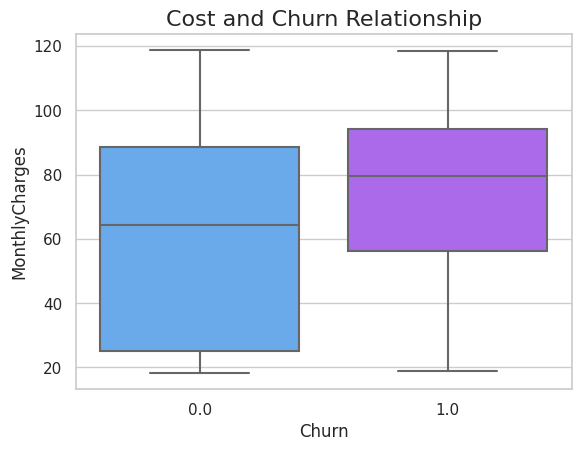

In [84]:
# relationship between cost and churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="cool")
# Set a title for the entire figure
plt.title('Cost and Churn Relationship', fontsize=16)
plt.subplots_adjust(top=0.85)

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "cost_and_churn.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

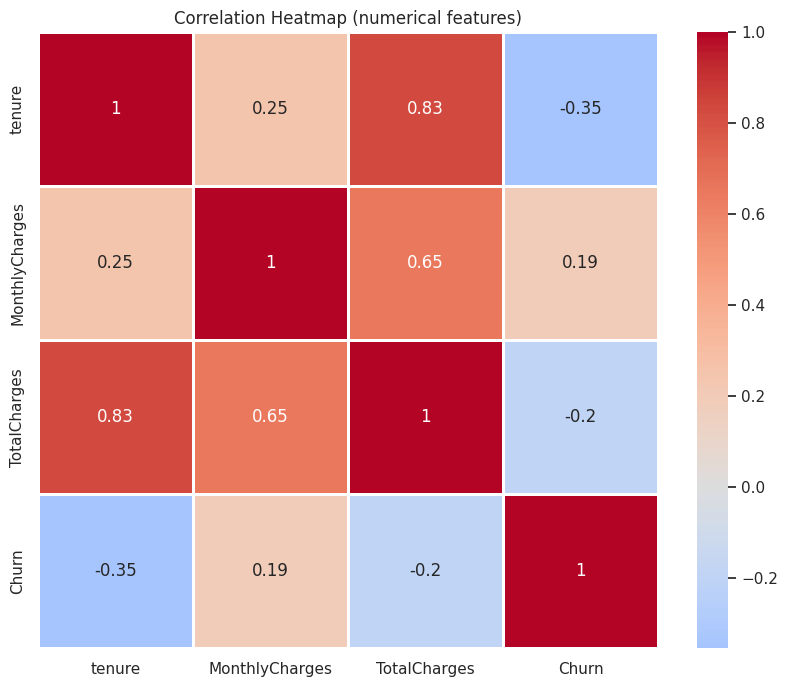

Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [87]:
# Calculate correlation matrix of numerical features
# Drop 'SeniorCitizen' before correlation calculation
corr_matrix = df.drop(columns=['SeniorCitizen']).corr()

# Filter correlations related to 'Churn'
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

# Plot correlation heatmap without 'SeniorCitizen'
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Heatmap (numerical features)')

# save image
save_path = os.path.join(os.path.abspath(".."), "visuals", "corr_heatmap.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

# Print sorted correlations with Churn
print(churn_corr)

# Preprocessing

In [88]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

In [89]:
# creating pipelines for num and cat values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# One hot encoding since not ordinal cat values
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

In [90]:
# defining x and y

X = df.drop(['customerID','Churn'],axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})

In [91]:
# save to csv
X.to_csv('../data/X.csv', index=False)
y.to_csv('../data/y.csv', index=False)

ImportError: cannot import name 'SequenceNotStr' from 'pandas._typing' (/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/_typing.py)